# Imports and read in data

In [21]:
ls

001_sencha_assess_classification_using_json_summaries__make_csv.ipynb
002_sencha_assess_classification_using_json_summaries__plotting.ipynb
100_ksize_alphabet_vs_index.ipynb
101_visualze_theoretical_vs_observed_kmers.ipynb
checkf1-using-read-by-read-summary.ipynb
divergence_time__vs__peptide_ksize__best_f1_score.pdf
divergence_time__vs__peptide_ksize__best_precision.pdf
divergence_time__vs__peptide_ksize__best_recall.pdf
download
mammal_index__ksize-9__molecule-protein.bloomfilter
n_observed_vs_theoretical_kmers_eukaryota.csv
n_observed_vs_theoretical_kmers_mammalia.csv
n_observed_vs_theoretical_kmers_opisthokonta.csv
n_observed_vs_theoretical_kmers_per_uniprot_database.csv
QfO_vertebrates_s100_sencha_translate_summaries.csv
species_metadata.csv
total_sequence_lengths.csv


In [82]:
import glob

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


dfs = []

for filename in glob.glob('n_observed_vs_theoretical_kmers*.csv'):
    if 'per_uniprot_database' not in filename:
        df = pd.read_csv(filename)
        dfs.append(df)
    

# index_stats = pd.read_csv('n_observed_vs_theoretical_kmers_mammalia.csv')
index_stats = pd.concat(dfs)
print(index_stats.shape)
index_stats.head()

(630, 9)


,name,molecule,ksize,sigma,expected_collisions,n_unique_kmers,n_theoretical_kmers_log10,n_unique_kmers_log10,unique_over_theoretical_log10
0,bacteria,protein20,2,20,2.560001e-26,400,2.60206,2.602060,0.000000
1,bacteria,protein20,3,20,4.096002e-21,8000,3.90309,3.903090,0.000000
2,bacteria,protein20,4,20,6.525795e-16,159843,5.20412,5.203694,-0.000426
3,bacteria,protein20,5,20,6.018420e-11,2789332,6.50515,6.445500,-0.059650
4,bacteria,protein20,6,20,1.319004e-07,19241387,7.80618,7.284236,-0.521944


In [91]:
sequence_lengths = pd.read_csv('total_sequence_lengths.csv', index_col=0)
sequence_lengths = sequence_lengths.sort_values('n_residues')
print(sequence_lengths.shape)
sequence_lengths.head()

(8, 5)


,n_sequences,n_residues,n_residues_log10,n_sequences_log10,tablesize
archea,19613,5679297,6.754295,4.292544,7
mammalia,67241,33332118,7.522863,4.827634,8
opisthokonta,141854,64718973,7.811032,5.151842,8
eukaryota,190642,83870914,7.923611,5.280219,8
bacteria,334482,104786625,8.020306,5.524373,9


In [124]:
database_order = sequence_lengths.index.tolist()
# Uniref is largest and last one
database_order.pop(-1)
database_order

['archea',
 'mammalia',
 'opisthokonta',
 'eukaryota',
 'bacteria',
 'not_eukaryota',
 'swissprot']

## Join sequence lengths column

In [125]:
index_stats_lengths = index_stats.join(sequence_lengths, on='name')
print(index_stats_lengths.shape)
index_stats_lengths.head()

(630, 14)


,name,molecule,ksize,sigma,expected_collisions,n_unique_kmers,n_theoretical_kmers_log10,n_unique_kmers_log10,unique_over_theoretical_log10,n_sequences,n_residues,n_residues_log10,n_sequences_log10,tablesize
0,bacteria,protein20,2,20,2.560001e-26,400,2.60206,2.602060,0.000000,334482,104786625,8.020306,5.524373,9
1,bacteria,protein20,3,20,4.096002e-21,8000,3.90309,3.903090,0.000000,334482,104786625,8.020306,5.524373,9
2,bacteria,protein20,4,20,6.525795e-16,159843,5.20412,5.203694,-0.000426,334482,104786625,8.020306,5.524373,9
3,bacteria,protein20,5,20,6.018420e-11,2789332,6.50515,6.445500,-0.059650,334482,104786625,8.020306,5.524373,9
4,bacteria,protein20,6,20,1.319004e-07,19241387,7.80618,7.284236,-0.521944,334482,104786625,8.020306,5.524373,9


In [126]:
index_stats_lengths['n_residues_over_theoretical_kmers_log10'] = index_stats_lengths['n_residues_log10'] - index_stats_lengths['n_theoretical_kmers_log10']
index_stats_lengths.head()

,name,molecule,ksize,sigma,expected_collisions,n_unique_kmers,n_theoretical_kmers_log10,n_unique_kmers_log10,unique_over_theoretical_log10,n_sequences,n_residues,n_residues_log10,n_sequences_log10,tablesize,n_residues_over_theoretical_kmers_log10
0,bacteria,protein20,2,20,2.560001e-26,400,2.60206,2.602060,0.000000,334482,104786625,8.020306,5.524373,9,5.418246
1,bacteria,protein20,3,20,4.096002e-21,8000,3.90309,3.903090,0.000000,334482,104786625,8.020306,5.524373,9,4.117216
2,bacteria,protein20,4,20,6.525795e-16,159843,5.20412,5.203694,-0.000426,334482,104786625,8.020306,5.524373,9,2.816186
3,bacteria,protein20,5,20,6.018420e-11,2789332,6.50515,6.445500,-0.059650,334482,104786625,8.020306,5.524373,9,1.515156
4,bacteria,protein20,6,20,1.319004e-07,19241387,7.80618,7.284236,-0.521944,334482,104786625,8.020306,5.524373,9,0.214126


In [127]:
index_stats_lengths.query('n_residues_over_theoretical_kmers_log10 < -4').groupby(['name', 'molecule']).apply(
    lambda x: x.nlargest(1, columns='n_residues_over_theoretical_kmers_log10'))

name   molecule  ksize  sigma  \
name          molecule                                               
archea        dayhoff6  42         archea   dayhoff6     14      6   
              protein20 7          archea  protein20      9     20   
bacteria      dayhoff6  44       bacteria   dayhoff6     16      6   
              protein20 8        bacteria  protein20     10     20   
eukaryota     dayhoff6  44      eukaryota   dayhoff6     16      6   
              protein20 8       eukaryota  protein20     10     20   
mammalia      dayhoff6  43       mammalia   dayhoff6     15      6   
              protein20 7        mammalia  protein20      9     20   
not_eukaryota dayhoff6  44  not_eukaryota   dayhoff6     16      6   
              protein20 8   not_eukaryota  protein20     10     20   
opisthokonta  dayhoff6  44   opisthokonta   dayhoff6     16      6   
              protein20 8    opisthokonta  protein20     10     20   
swissprot     dayhoff6  44      swissprot   dayhoff6     16      6   
              protein20 8       swissprot  protein20     10     20   

                            expected_collisions  n_unique_kmers  \
name          molecule                                            
archea        dayhoff6  42             0.009714         3759620   
              protein20 7              0.013913         4194422   
bacteria      dayhoff6  44             0.000002        40135874   
              protein20 8              0.000004        46397424   
eukaryota     dayhoff6  44             0.026033        51044053   
              protein20 8              0.034246        55775453   
mammalia      dayhoff6  43             0.000574        16812302   
              protein20 7              0.000828        18580685   
not_eukaryota dayhoff6  44             0.000005        47907229   
              protein20 8              0.000008        54928963   
opisthokonta  dayhoff6  44             0.010735        38747210   
              protein20 8              0.014496        42469751   
swissprot     dayhoff6  44             0.000078        98802376   
              protein20 8              0.000122       111107835   

                            n_theoretical_kmers_log10  n_unique_kmers_log10  \
name          molecule                                                        
archea        dayhoff6  42                  10.894118              6.575144   
              protein20 7                   11.709270              6.622672   
bacteria      dayhoff6  44                  12.450420              7.603533   
              protein20 8                   13.010300              7.666494   
eukaryota     dayhoff6  44                  12.450420              7.707945   
              protein20 8                   13.010300              7.746443   
mammalia      dayhoff6  43                  11.672269              7.225627   
              protein20 7                   11.709270              7.269062   
not_eukaryota dayhoff6  44                  12.450420              7.680401   
              protein20 8                   13.010300              7.739801   
opisthokonta  dayhoff6  44                  12.450420              7.588240   
              protein20 8                   13.010300              7.628080   
swissprot     dayhoff6  44                  12.450420              7.994767   
              protein20 8                   13.010300              8.045745   

                            unique_over_theoretical_log10  n_sequences  \
name          molecule                                                   
archea        dayhoff6  42                      -4.318974        19613   
              protein20 7                       -5.086598        19613   
bacteria      dayhoff6  44                      -4.846887       334482   
              protein20 8                       -5.343806       334482   
eukaryota     dayhoff6  44                      -4.742475       190642   
              protein20 8                       -5.263857   

In [128]:
f'{18020090:.1e}'

'1.8e+07'

In [129]:
import math

def min_length_to_control_false_postive_rate(fpr, ksize, sigma, n_observed):
    n_theoretical = math.pow(sigma, ksize)
    log_term = math.log(1 - n_observed / n_theoretical)
    numerator = math.log(fpr) + (ksize - 1) * log_term
    result = numerator / log_term
#     import pdb ;pdb.set_trace()
    return result

min_length_to_control_false_postive_rate(fpr=1e-10, ksize=9, sigma=20, n_observed=2e7)

589458.2708065915

In [130]:
math.pow?

Signature: math.pow(x, y, /)
Docstring: Return x**y (x to the power of y).
Type:      builtin_function_or_method


In [131]:
n_observed = 2e7
ksize = 15
sigma = 6
n_theoretical = sigma ** ksize
translation_length = 16

assert translation_length > ksize

collision_rate = 8.393039e-04

n_kmers = exponent = translation_length - ksize + 1
print("(n_observed / n_theoretical):", (n_observed / n_theoretical))
print("(n_observed * (1 + collision_rate) / n_theoretical):", 
      (n_observed * (1 + collision_rate) / n_theoretical))
# (1 - (n_observed / n_theoretical)) ** exponent
(n_observed / (n_theoretical * collision_rate) ) ** n_kmers

(n_observed / n_theoretical): 4.253644981460957e-05
(n_observed * (1 + collision_rate) / n_theoretical): 4.257215082283113e-05


0.002568526184875147

In [132]:
def compute_kmers_fpr(ksize, sigma, n_observed, collision_rate, n_kmers):
    """Given number of observed k-mers, compute false positive rate"""
    
    n_theoretical = sigma ** ksize

    log_fpr = n_kmers * math.log(n_observed / (n_theoretical * collision_rate) )
#     print(f'log_fpr: {log_fpr}')
    
    # This value should be negative .. weird stuff is happening if it is not
#     if log_fpr > 0:
#         return NOne
    return log_fpr


def compute_translation_fpr(ksize, sigma, n_observed, collision_rate, translation_length):
    assert translation_length > ksize
        
    # Number of k-mers per read
    n_kmers = translation_length - ksize + 1
    log_fpr = compute_kmers_fpr(ksize, sigma, n_observed, collision_rate, n_kmers)
    return log_fpr
    

def compute_read_fpr(ksize, sigma, n_observed, collision_rate, read_length):
    translation_length = math.floor(read_length / 3)
    per_translation_log_fpr = compute_translation_fpr(ksize, sigma, n_observed, 
                                                  collision_rate, translation_length)
#     per_read_log_fpr = math.log(6) + per_translation_log_fpr
    return per_translation_log_fpr


index_stats['readlen100_log_fpr'] = index_stats.apply(lambda x: compute_read_fpr(
    x.ksize, x.sigma, x.n_unique_kmers, x.expected_collisions, 100), axis=1)
index_stats.head(20)

,name,molecule,ksize,sigma,expected_collisions,n_unique_kmers,n_theoretical_kmers_log10,n_unique_kmers_log10,unique_over_theoretical_log10,readlen100_log_fpr
0,bacteria,protein20,2,20,2.560001e-26,400,2.60206,2.602060,0.000000,1885.670550
1,bacteria,protein20,3,20,4.096002e-21,8000,3.90309,3.903090,0.000000,1455.272544
2,bacteria,protein20,4,20,6.525795e-16,159843,5.20412,5.203694,-0.000426,1048.938511
3,bacteria,protein20,5,20,6.018420e-11,2789332,6.50515,6.445500,-0.059650,678.491614
4,bacteria,protein20,6,20,1.319004e-07,19241387,7.80618,7.284236,-0.521944,409.903170
5,bacteria,protein20,7,20,1.710768e-06,36834852,9.10721,7.566259,-1.540951,262.720732
6,bacteria,protein20,8,20,2.959658e-06,42362341,10.40824,7.626980,-2.781260,164.485076
7,bacteria,protein20,9,20,3.645783e-06,44681674,11.70927,7.650129,-4.059141,79.385570
8,bacteria,protein20,10,20,4.224642e-06,46397424,13.01030,7.666494,-5.343806,1.680190
9,bacteria,protein20,11,20,4.763431e-06,47843047,14.31133,7.679819,-6.631511,-69.346757


In [133]:
(1/n_theoretical) ** translation_length

1.7526690108840223e-187

In [134]:
(1/n_theoretical) ** (translation_length - ksize + 1)

4.5233739070769964e-24

## Plot ksize vs number of unique protein k-mers

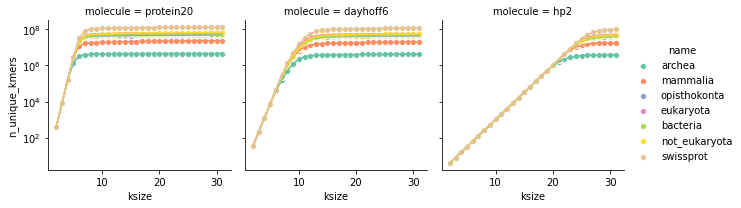

In [157]:
def ksize_vs_n_kmers(df, x='ksize', y='n_unique_kmers', y_line=None,
                     hue='name', col='molecule', n_residues_kwargs={}, **kwargs):
    g = sns.FacetGrid(data=df, hue=hue, col=col, **kwargs)
    if y_line is not None:
        g.map(plt.plot, x, y_line, linestyle='--', **n_residues_kwargs)
    g.map(sns.scatterplot, x, y)
    g.map(plt.plot, x, y)
    g.add_legend()
    return g

g = ksize_vs_n_kmers(index_stats_lengths, palette='Set2', hue_order=database_order)
g.set(yscale='log')

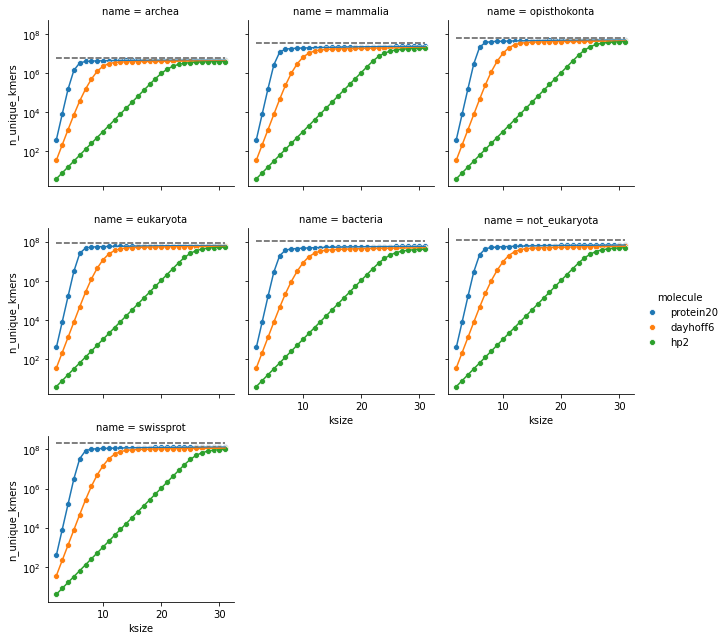

In [158]:
g = ksize_vs_n_kmers(index_stats_lengths, hue='molecule', col='name', y_line='n_residues',
                 col_wrap=3,
                 n_residues_kwargs=dict(color='grey'), 
                 col_order=database_order)
g.set(yscale='log')

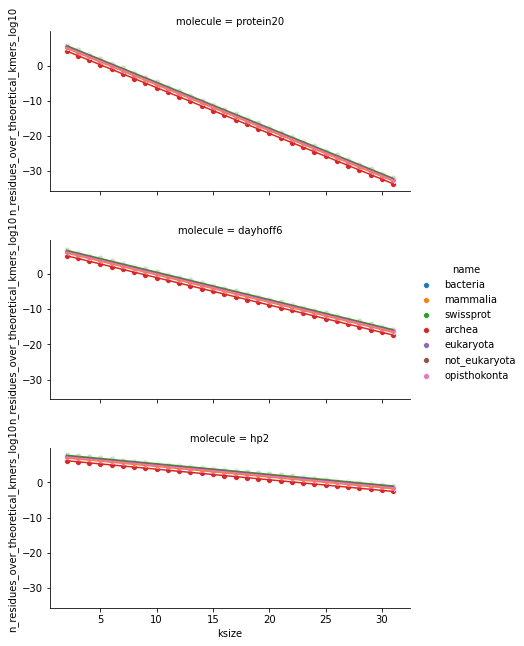

In [137]:
g = sns.FacetGrid(aspect=2, height=3,
            data=index_stats_lengths, hue='name', col='molecule', col_wrap=1)

# g.set(lim=(1e-8, 1e2))
g.map(sns.scatterplot, 'ksize', 'n_residues_over_theoretical_kmers_log10')
g.map(plt.plot, 'ksize', 'n_residues_over_theoretical_kmers_log10')
g.add_legend()

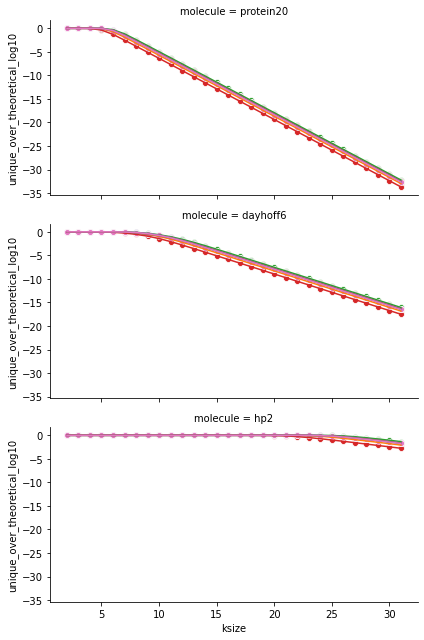

In [138]:
g = sns.FacetGrid(aspect=2, height=3,
            data=index_stats, hue='name', col='molecule', col_wrap=1)

# g.set(lim=(1e-8, 1e2))
g.map(sns.scatterplot, 'ksize', 'unique_over_theoretical_log10')
g.map(plt.plot, 'ksize', 'unique_over_theoretical_log10')

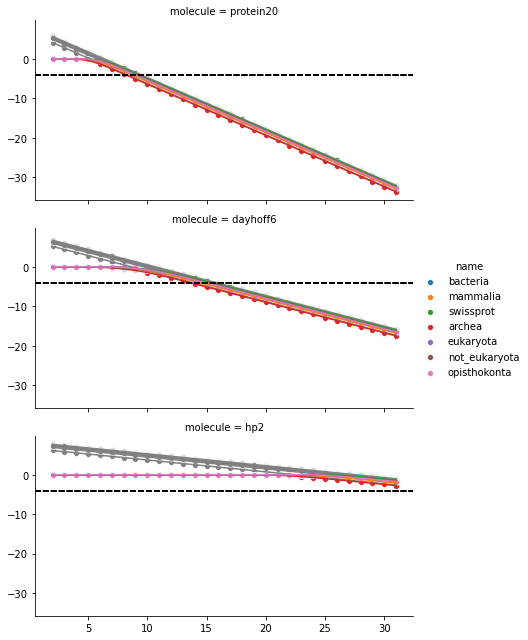

In [139]:
g = sns.FacetGrid(aspect=2, height=3,
            data=index_stats_lengths, hue='name', col='molecule', col_wrap=1)

g.map(sns.scatterplot, 'ksize', 'n_residues_over_theoretical_kmers_log10', color='grey')
g.map(plt.plot, 'ksize', 'n_residues_over_theoretical_kmers_log10', color='grey')

# g.set(lim=(1e-8, 1e2))
g.map(sns.scatterplot, 'ksize', 'unique_over_theoretical_log10')
g.map(plt.plot, 'ksize', 'unique_over_theoretical_log10')

g.map(plt.axhline, y=-4, color='black', linestyle='--')
g.add_legend()



In [140]:
index_stats_lengths['unique_over_residues_log10'] = index_stats_lengths['n_unique_kmers_log10'] - index_stats_lengths['n_residues_log10']
index_stats_lengths['unique_over_residues'] = np.power(10, index_stats_lengths['unique_over_residues_log10'])
index_stats_lengths

,name,molecule,ksize,sigma,expected_collisions,n_unique_kmers,n_theoretical_kmers_log10,n_unique_kmers_log10,unique_over_theoretical_log10,n_sequences,n_residues,n_residues_log10,n_sequences_log10,tablesize,n_residues_over_theoretical_kmers_log10,unique_over_residues_log10,unique_over_residues
0,bacteria,protein20,2,20,2.560001e-26,400,2.60206,2.602060,0.000000,334482,104786625,8.020306,5.524373,9,5.418246,-5.418246,0.000004
1,bacteria,protein20,3,20,4.096002e-21,8000,3.90309,3.903090,0.000000,334482,104786625,8.020306,5.524373,9,4.117216,-4.117216,0.000076
2,bacteria,protein20,4,20,6.525795e-16,159843,5.20412,5.203694,-0.000426,334482,104786625,8.020306,5.524373,9,2.816186,-2.816612,0.001525
3,bacteria,protein20,5,20,6.018420e-11,2789332,6.50515,6.445500,-0.059650,334482,104786625,8.020306,5.524373,9,1.515156,-1.574806,0.026619
4,bacteria,protein20,6,20,1.319004e-07,19241387,7.80618,7.284236,-0.521944,334482,104786625,8.020306,5.524373,9,0.214126,-0.736069,0.183624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,opisthokonta,hp2,27,2,6.620424e-03,33535009,8.12781,7.525498,-0.602311,141854,64718973,7.811032,5.151842,8,-0.316778,-0.285533,0.518163
86,opisthokonta,hp2,28,2,8.828373e-03,36526833,8.42884,7.562612,-0.866228,141854,64718973,7.811032,5.151842,8,-0.617808,-0.248420,0.564391
87,opisthokonta,hp2,29,2,1.038864e-02,38365437,8.72987,7.583940,-1.145930,141854,64718973,7.811032,5.151842,8,-0.918838,-0.227091,0.592800
88,opisthokonta,hp2,30,2,1.143452e-02,39496781,9.03090,7.596562,-1.434338,141854,64718973,7.811032,5.151842,8,-1.219868,-0.214470,0.610281


In [141]:
index_stats_lengths.head(10)

,name,molecule,ksize,sigma,expected_collisions,n_unique_kmers,n_theoretical_kmers_log10,n_unique_kmers_log10,unique_over_theoretical_log10,n_sequences,n_residues,n_residues_log10,n_sequences_log10,tablesize,n_residues_over_theoretical_kmers_log10,unique_over_residues_log10,unique_over_residues
0,bacteria,protein20,2,20,2.560001e-26,400,2.60206,2.602060,0.000000,334482,104786625,8.020306,5.524373,9,5.418246,-5.418246,0.000004
1,bacteria,protein20,3,20,4.096002e-21,8000,3.90309,3.903090,0.000000,334482,104786625,8.020306,5.524373,9,4.117216,-4.117216,0.000076
2,bacteria,protein20,4,20,6.525795e-16,159843,5.20412,5.203694,-0.000426,334482,104786625,8.020306,5.524373,9,2.816186,-2.816612,0.001525
3,bacteria,protein20,5,20,6.018420e-11,2789332,6.50515,6.445500,-0.059650,334482,104786625,8.020306,5.524373,9,1.515156,-1.574806,0.026619
4,bacteria,protein20,6,20,1.319004e-07,19241387,7.80618,7.284236,-0.521944,334482,104786625,8.020306,5.524373,9,0.214126,-0.736069,0.183624
5,bacteria,protein20,7,20,1.710768e-06,36834852,9.10721,7.566259,-1.540951,334482,104786625,8.020306,5.524373,9,-1.086904,-0.454047,0.351522
6,bacteria,protein20,8,20,2.959658e-06,42362341,10.40824,7.626980,-2.781260,334482,104786625,8.020306,5.524373,9,-2.387934,-0.393326,0.404272
7,bacteria,protein20,9,20,3.645783e-06,44681674,11.70927,7.650129,-4.059141,334482,104786625,8.020306,5.524373,9,-3.688964,-0.370176,0.426406
8,bacteria,protein20,10,20,4.224642e-06,46397424,13.01030,7.666494,-5.343806,334482,104786625,8.020306,5.524373,9,-4.989994,-0.353812,0.442780
9,bacteria,protein20,11,20,4.763431e-06,47843047,14.31133,7.679819,-6.631511,334482,104786625,8.020306,5.524373,9,-6.291024,-0.340487,0.456576


In [142]:
index_stats_lengths.query('(molecule == "protein20") & (ksize > 8) & (ksize < 12)')

,name,molecule,ksize,sigma,expected_collisions,n_unique_kmers,n_theoretical_kmers_log10,n_unique_kmers_log10,unique_over_theoretical_log10,n_sequences,n_residues,n_residues_log10,n_sequences_log10,tablesize,n_residues_over_theoretical_kmers_log10,unique_over_residues_log10,unique_over_residues
7,bacteria,protein20,9,20,0.000004,44681674,11.70927,7.650129,-4.059141,334482,104786625,8.020306,5.524373,9,-3.688964,-0.370176,0.426406
8,bacteria,protein20,10,20,0.000004,46397424,13.01030,7.666494,-5.343806,334482,104786625,8.020306,5.524373,9,-4.989994,-0.353812,0.442780
9,bacteria,protein20,11,20,0.000005,47843047,14.31133,7.679819,-6.631511,334482,104786625,8.020306,5.524373,9,-6.291024,-0.340487,0.456576
7,mammalia,protein20,9,20,0.000828,18580685,11.70927,7.269062,-4.440208,67241,33332118,7.522863,4.827634,8,-4.186407,-0.253801,0.557441
8,mammalia,protein20,10,20,0.000910,19076334,13.01030,7.280495,-5.729805,67241,33332118,7.522863,4.827634,8,-5.487437,-0.242368,0.572311
9,mammalia,protein20,11,20,0.000988,19508095,14.31133,7.290215,-7.021115,67241,33332118,7.522863,4.827634,8,-6.788467,-0.232648,0.585264
7,swissprot,protein20,9,20,0.000110,107937780,11.70927,8.033173,-3.676096,561911,202173710,8.305725,5.749668,9,-3.403545,-0.272551,0.533886
8,swissprot,protein20,10,20,0.000122,111107835,13.01030,8.045745,-4.964555,561911,202173710,8.305725,5.749668,9,-4.704575,-0.259980,0.549566
9,swissprot,protein20,11,20,0.000133,113700258,14.31133,8.055761,-6.255569,561911,202173710,8.305725,5.749668,9,-6.005605,-0.249963,0.562389
7,archea,protein20,9,20,0.013913,4194422,11.70927,6.622672,-5.086598,19613,5679297,6.754295,4.292544,7,-4.954975,-0.131622,0.738546


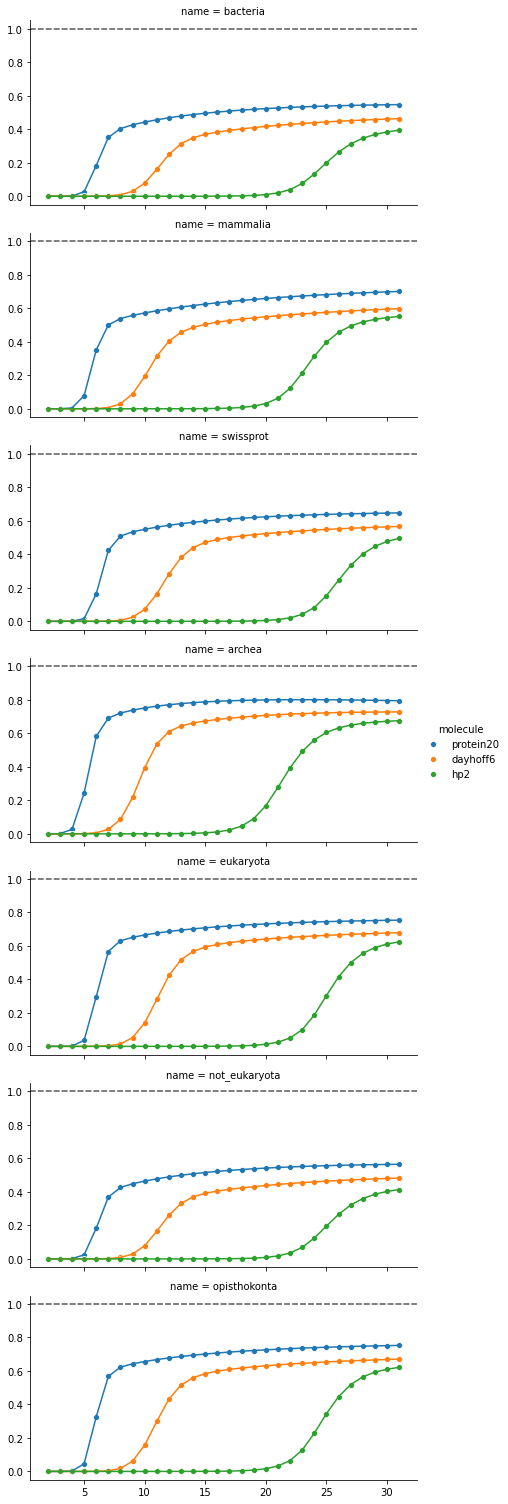

In [143]:
g = sns.FacetGrid(aspect=2, height=3,
            data=index_stats_lengths, hue='molecule', col='name', col_wrap=1)

g.map(sns.scatterplot, 'ksize', 'unique_over_residues')
g.map(plt.plot, 'ksize', 'unique_over_residues')

g.map(plt.axhline, y=1, color='grey', linestyle='--', zorder=-1)
g.add_legend()



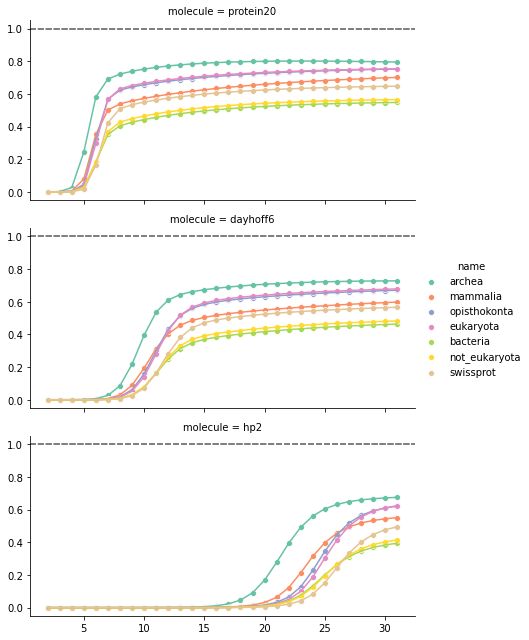

In [144]:
g = sns.FacetGrid(aspect=2, height=3, hue_order=database_order, palette='Set2',
            data=index_stats_lengths, hue='name', col='molecule', col_wrap=1)

g.map(sns.scatterplot, 'ksize', 'unique_over_residues', zorder=1)
g.map(plt.plot, 'ksize', 'unique_over_residues', zorder=1)

g.map(plt.axhline, y=1, color='grey', linestyle='--', zorder=-1)
# g.map(plt.axhline, y=0.5, color='grey', linestyle='-', zorder=-1)
g.add_legend()



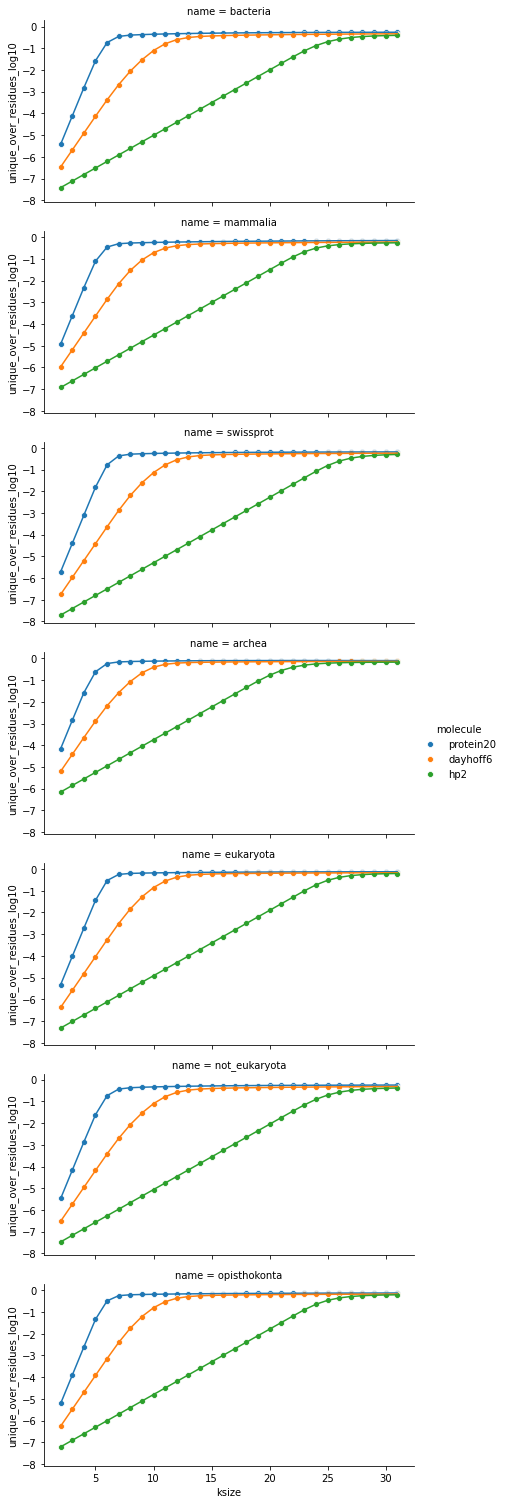

In [145]:
g = sns.FacetGrid(aspect=2, height=3,
            data=index_stats_lengths, hue='molecule', col='name', col_wrap=1)

g.map(sns.scatterplot, 'ksize', 'unique_over_residues_log10')
g.map(plt.plot, 'ksize', 'unique_over_residues_log10')

# g.map(plt.axhline, y=-4, color='black', linestyle='--')
g.add_legend()

In [146]:
nonzero_ratio = index_stats_lengths.query('unique_over_theoretical_log10 < 0')
nonzero_ratio

,name,molecule,ksize,sigma,expected_collisions,n_unique_kmers,n_theoretical_kmers_log10,n_unique_kmers_log10,unique_over_theoretical_log10,n_sequences,n_residues,n_residues_log10,n_sequences_log10,tablesize,n_residues_over_theoretical_kmers_log10,unique_over_residues_log10,unique_over_residues
2,bacteria,protein20,4,20,6.525795e-16,159843,5.20412,5.203694,-0.000426,334482,104786625,8.020306,5.524373,9,2.816186,-2.816612,0.001525
3,bacteria,protein20,5,20,6.018420e-11,2789332,6.50515,6.445500,-0.059650,334482,104786625,8.020306,5.524373,9,1.515156,-1.574806,0.026619
4,bacteria,protein20,6,20,1.319004e-07,19241387,7.80618,7.284236,-0.521944,334482,104786625,8.020306,5.524373,9,0.214126,-0.736069,0.183624
5,bacteria,protein20,7,20,1.710768e-06,36834852,9.10721,7.566259,-1.540951,334482,104786625,8.020306,5.524373,9,-1.086904,-0.454047,0.351522
6,bacteria,protein20,8,20,2.959658e-06,42362341,10.40824,7.626980,-2.781260,334482,104786625,8.020306,5.524373,9,-2.387934,-0.393326,0.404272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,opisthokonta,hp2,27,2,6.620424e-03,33535009,8.12781,7.525498,-0.602311,141854,64718973,7.811032,5.151842,8,-0.316778,-0.285533,0.518163
86,opisthokonta,hp2,28,2,8.828373e-03,36526833,8.42884,7.562612,-0.866228,141854,64718973,7.811032,5.151842,8,-0.617808,-0.248420,0.564391
87,opisthokonta,hp2,29,2,1.038864e-02,38365437,8.72987,7.583940,-1.145930,141854,64718973,7.811032,5.151842,8,-0.918838,-0.227091,0.592800
88,opisthokonta,hp2,30,2,1.143452e-02,39496781,9.03090,7.596562,-1.434338,141854,64718973,7.811032,5.151842,8,-1.219868,-0.214470,0.610281


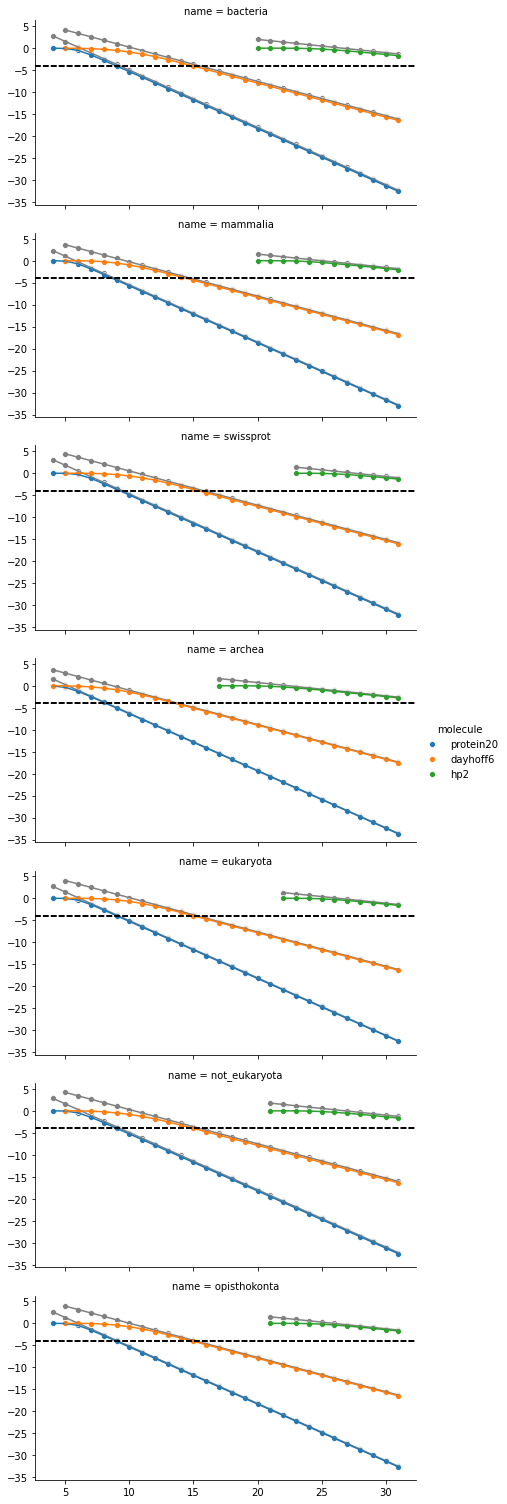

In [147]:
g = sns.FacetGrid(aspect=2, height=3,
            data=nonzero_ratio, col='name', hue='molecule', col_wrap=1)

g.map(sns.scatterplot, 'ksize', 'n_residues_over_theoretical_kmers_log10', color='grey')
g.map(plt.plot, 'ksize', 'n_residues_over_theoretical_kmers_log10', color='grey')

# g.set(lim=(1e-8, 1e2))
g.map(sns.scatterplot, 'ksize', 'unique_over_theoretical_log10')
g.map(plt.plot, 'ksize', 'unique_over_theoretical_log10')

g.map(plt.axhline, y=-4, color='black', linestyle='--')
g.add_legend()



# Transforms to plot number of unique vs theoretical k-mers

In [148]:
theoretical_vs_observed_kmers = index_stats.set_index(['name', 'molecule', 'ksize', 'sigma'])[['n_theoretical_kmers_log10', 'n_unique_kmers_log10']].stack()
theoretical_vs_observed_kmers = theoretical_vs_observed_kmers.reset_index()
theoretical_vs_observed_kmers = theoretical_vs_observed_kmers.rename(
    columns={0: 'n_kmers_log10', 'level_4': 'theoretical_or_unique'}) 
theoretical_vs_observed_kmers['n_kmers'] = np.power(10, theoretical_vs_observed_kmers['n_kmers_log10']).astype(int)

# Set overflows to nan
overflow_rows = theoretical_vs_observed_kmers.query('n_kmers_log10 > 16').index
theoretical_vs_observed_kmers.loc[overflow_rows, 'n_kmers'] = np.nan

theoretical_vs_observed_kmers['kmer_type'] = theoretical_vs_observed_kmers['theoretical_or_unique'].str.split('_').str[1]
theoretical_vs_observed_kmers['kmer_type'] = theoretical_vs_observed_kmers.kmer_type.replace('unique', 'observed')
theoretical_vs_observed_kmers['alphabet_type'] = theoretical_vs_observed_kmers.apply(
    lambda x: '{molecule} (sigma = {sigma}, {kmer_type})'.format(**x), axis=1)
theoretical_vs_observed_kmers.head()

,name,molecule,ksize,sigma,theoretical_or_unique,n_kmers_log10,n_kmers,kmer_type,alphabet_type
0,bacteria,protein20,2,20,n_theoretical_kmers_log10,2.60206,400.0,theoretical,"protein20 (sigma = 20, theoretical)"
1,bacteria,protein20,2,20,n_unique_kmers_log10,2.60206,400.0,observed,"protein20 (sigma = 20, observed)"
2,bacteria,protein20,3,20,n_theoretical_kmers_log10,3.90309,8000.0,theoretical,"protein20 (sigma = 20, theoretical)"
3,bacteria,protein20,3,20,n_unique_kmers_log10,3.90309,8000.0,observed,"protein20 (sigma = 20, observed)"
4,bacteria,protein20,4,20,n_theoretical_kmers_log10,5.20412,159999.0,theoretical,"protein20 (sigma = 20, theoretical)"


In [149]:
# theoretical_vs_observed_kmers.query('n_kmers_log10 >= 16')

In [150]:
# theoretical_vs_observed_kmers.query('(ksize >= 23) and (molecule == "dayhoff6")')

In [151]:
theoretical_vs_observed_kmers_subset = theoretical_vs_observed_kmers.query('ksize <= 32')

/home/olga/miniconda3/envs/sencha/lib/python3.7/site-packages/seaborn/axisgrid.py:28: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)


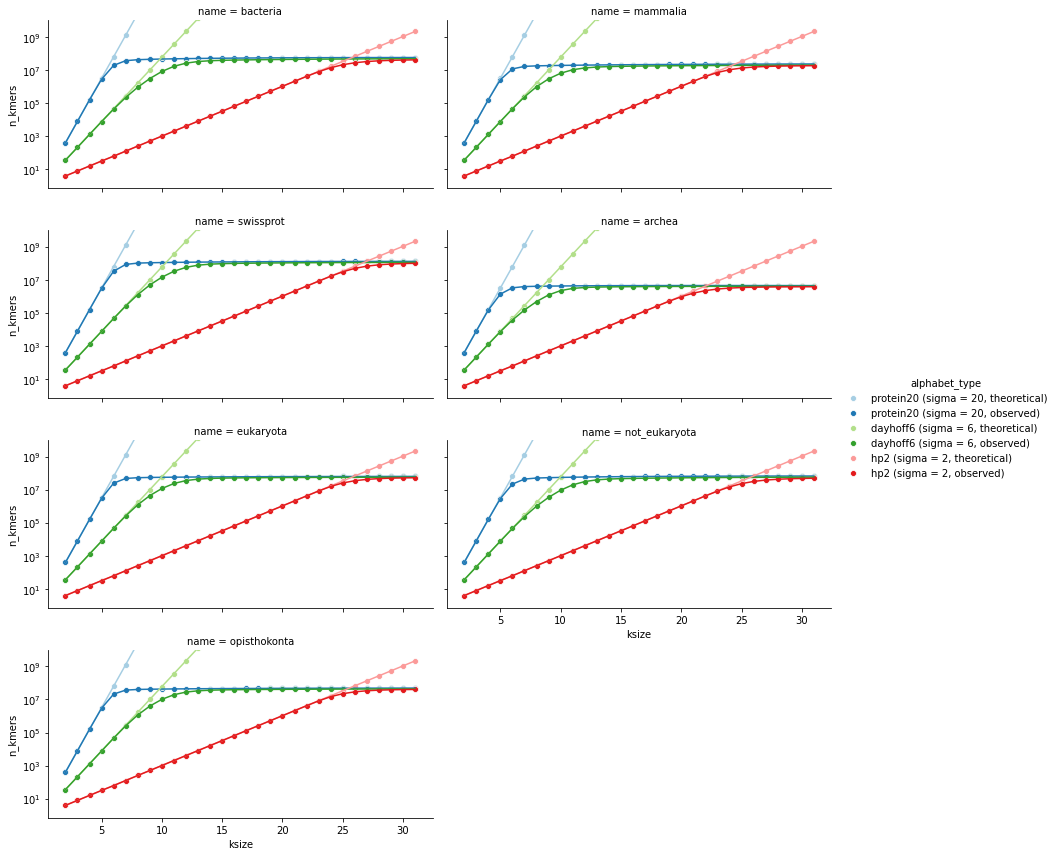

In [156]:
g = sns.FacetGrid(subplot_kws=dict(yscale='log'),
            data=theoretical_vs_observed_kmers_subset, col_wrap=2, aspect=2, height=3,
           hue='alphabet_type', col='name', palette='Paired')
# g.map(sns.regplot, 'ksize', 'n_kmers', ci=None, fit_reg=False)
g.map(sns.scatterplot, 'ksize', 'n_kmers')
g.map(plt.plot, 'ksize', 'n_kmers')
g.add_legend()
g.set(ylim=(0, 1e10))

/home/olga/miniconda3/envs/sencha/lib/python3.7/site-packages/seaborn/axisgrid.py:28: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)


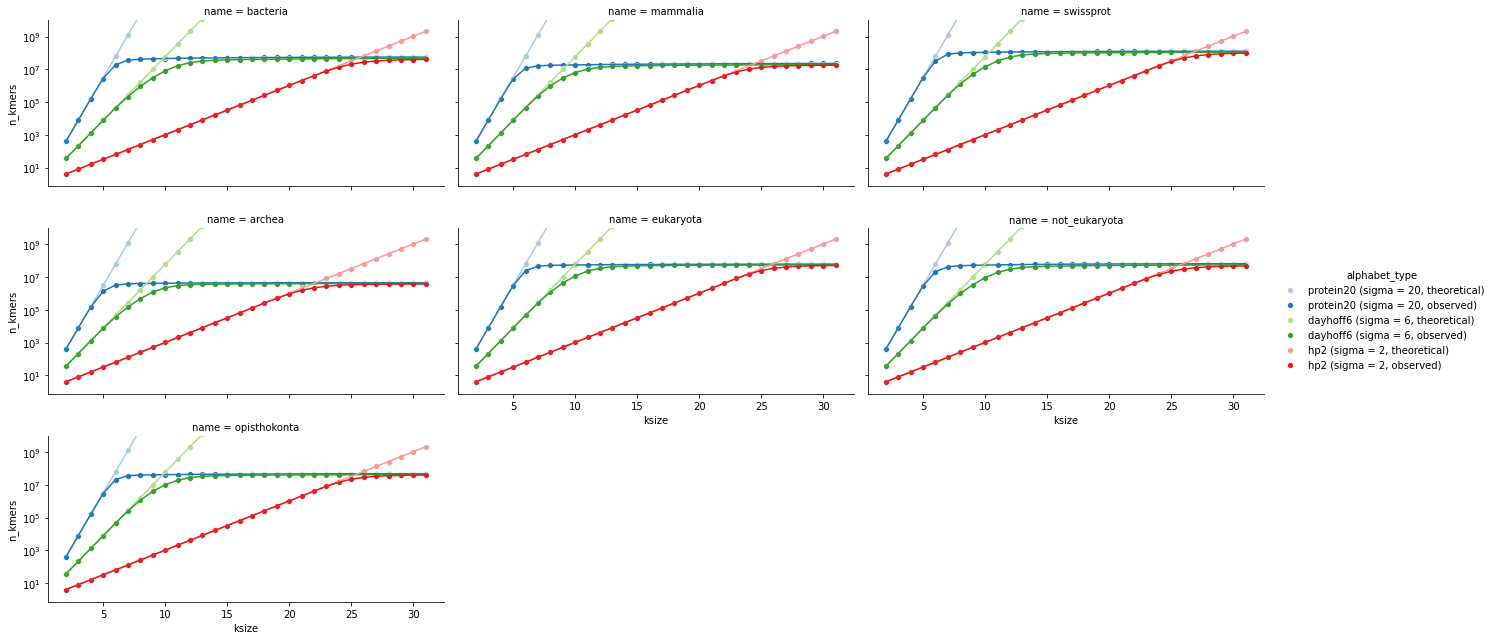

In [154]:
g = sns.FacetGrid(subplot_kws=dict(yscale='log'),
            data=theoretical_vs_observed_kmers_subset, col_wrap=3, aspect=2, height=3,
           hue='alphabet_type', col='name', palette='Paired')
# g.map(sns.regplot, 'ksize', 'n_kmers', ci=None, fit_reg=False)
g.map(sns.scatterplot, 'ksize', 'n_kmers')
g.map(plt.plot, 'ksize', 'n_kmers')
g.add_legend()
g.set(ylim=(0, 1e10))

In [ ]:
ksize_vs_kmers()